In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1: Data Loading and Initial Exploration

- Load the dataset and display the first few rows.
- Summarize the dataset structure, including the number of rows, columns, and data types.

In [110]:
# Load the dataset
data = pd.read_csv('used_cars_data.csv')  

In [111]:
print(data.head()) 

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0 

In [112]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
None


In [113]:
print(data.describe())

             S.No.         Year  Kilometers_Driven        Seats        Price
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000


### Step 2: Data Cleaning

- Identify and handle missing values.
- Check for duplicate rows and handle them if necessary.
- Clean and standardize column names if needed.

In [114]:
data.isna()  # or data.isnull()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7249,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7250,False,False,False,False,False,False,False,False,False,False,False,False,True,True
7251,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [115]:
data.isna().sum()  # Shows missing values per column


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Here we can see how many null values in the each column, New_Price has the most nulls and not useful feature.

In [116]:
# Calculate percentage of nulls
null_percentage = data.isnull().mean() * 100

# Print null percentages for each column
print(null_percentage)

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64


Here 86 Percent of values are null in New_Price

<Axes: >

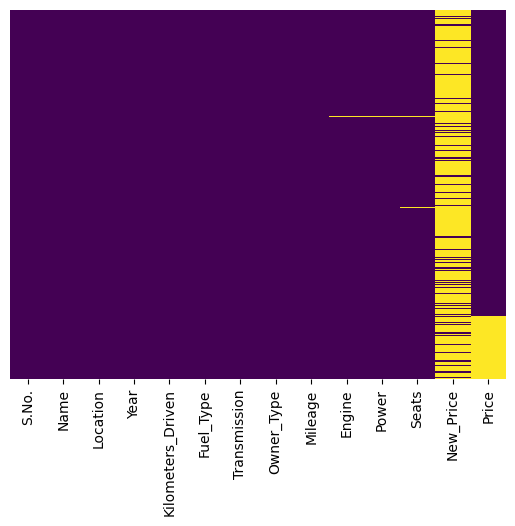

In [117]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This Heatmap clearly shows Null values in yellow color, this way we can easily interpret the distribution of Null Values in the data.

#### Removing the S.No 

In [118]:
data.drop('S.No.', axis=1, inplace=True)

In [119]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Removing the New_Price column because 86% are Null and dosent provide any value to the model

In [120]:
data.drop('New_Price', axis=1, inplace=True)

In [121]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [122]:
#Check for duplicates in the entire DataFrame
duplicates = data.duplicated()

# View the duplicate rows
duplicate_rows = data[duplicates]

print(duplicate_rows)

                     Name Location  Year  Kilometers_Driven Fuel_Type  \
6582  Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   

     Transmission Owner_Type    Mileage   Engine    Power  Seats  Price  
6582       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0    NaN  


In [123]:
len(data)

7253

In [124]:
# Remove duplicate rows
data = data.drop_duplicates()


In [125]:
len(data)

7252

In [126]:
#Check for duplicates in the entire DataFrame
duplicates = data.duplicated()

# View the duplicate rows
duplicate_rows = data[duplicates]

print(duplicate_rows)

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []


Here i checked for duplicates before and after the dropping the duplicated rows.

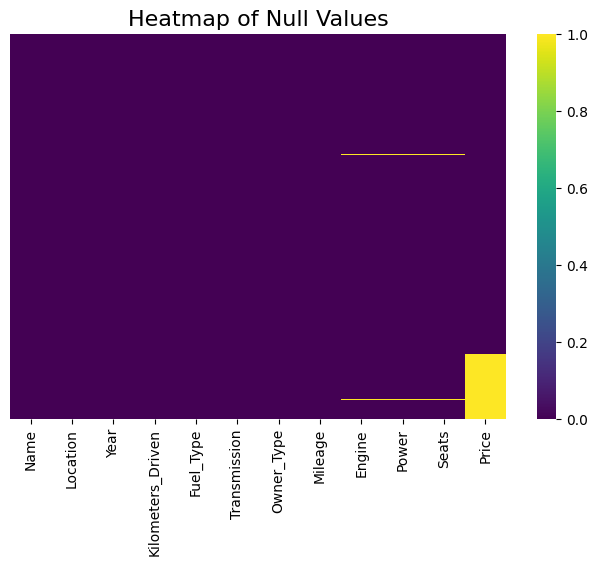

In [127]:
plt.figure(figsize=(8, 5))

# Create a heatmap to visualize null values
sns.heatmap(data.isnull(), cmap='viridis', cbar=True, yticklabels=False)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Add title
plt.title('Heatmap of Null Values', fontsize=16)

# Display the heatmap
plt.show()

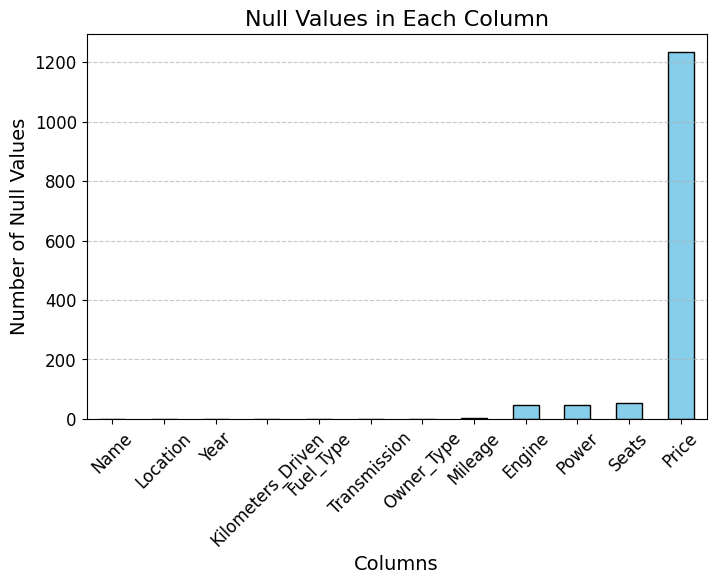

In [128]:
null_counts = data.isnull().sum()

# Plot the bar graph
plt.figure(figsize=(8, 5))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Null Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Null Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [129]:
data.isna().sum()  # Shows missing values per column


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1233
dtype: int64

In [130]:
# Step 1: Clean the Mileage column
data['Mileage'] = data['Mileage'].str.extract(r'(\d+\.?\d*)')  # Extract numeric values
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')  # Convert to float, NaN for invalid entries

# Step 2: Clean the Engine column
data['Engine'] = data['Engine'].str.replace(' CC', '', regex=False)
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')  # Convert to float, handle invalid entries

# Step 3: Clean the Power column
data['Power'] = data['Power'].replace('null', np.nan)  # Replace 'null' with NaN
data['Power'] = data['Power'].str.replace(' bhp', '', regex=False)
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')  # Convert to float, handle invalid entries

# Step 4: Clean the Price column
# Ensure the column is treated as string before applying .str.replace()
data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace(' Lakh', '', regex=False)
data['Price'] = data['Price'].str.replace('Cr', '00', regex=False)  # Handle "Cr" if present
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Convert to float

# Step 5: Handle missing values (e.g., Mileage, Engine, Power, Price)
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
data['Engine'].fillna(data['Engine'].median(), inplace=True)
data['Power'].fillna(data['Power'].median(), inplace=True)
data['Price'].fillna(data['Price'].median(), inplace=True)

# Step 6: Verify the cleaned data
print(data.head())



                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75  
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50  
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50  
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74  


C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\2777382523.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\2777382523.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

### Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats','Price']
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar plot for categorical columns
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Bivariate Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the loaded dataset
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']

# 1. Numerical vs Numerical
print("\nNumerical vs Numerical Analysis:")
sns.pairplot(data[numerical_cols], diag_kind='kde', kind='scatter', palette='coolwarm')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 2. Categorical vs Numerical
print("\nCategorical vs Numerical Analysis:")
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, x=cat_col, y=num_col, palette='viridis')
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.violinplot(data=data, x=cat_col, y=num_col, palette='muted')
        plt.title(f'Violin Plot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

# 3. Categorical vs Categorical
print("\nCategorical vs Categorical Analysis:")
for i, cat_col1 in enumerate(categorical_cols):
    for cat_col2 in categorical_cols[i + 1:]:
        # Contingency Table
        contingency_table = pd.crosstab(data[cat_col1], data[cat_col2])
        print(f"\nContingency Table for {cat_col1} and {cat_col2}:\n{contingency_table}\n")
        
        # Stacked Bar Plot
        contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
        plt.title(f'Stacked Bar Plot of {cat_col1} vs {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title=cat_col2)
        plt.show()


### Multivariate Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type']

# 1. Pair Plot for Numerical Variables
print("\nPair Plot for Numerical Variables:")
sns.pairplot(data[numerical_cols], diag_kind='kde', kind='scatter', palette='husl')
plt.show()

# 2. Heatmap for Correlation of Numerical Features
print("\nCorrelation Heatmap for Numerical Variables:")
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Grouped Bar Charts for Categorical Variables
print("\nGrouped Bar Charts for Categorical Variables:")
for cat_col1 in categorical_cols:
    for cat_col2 in categorical_cols:
        if cat_col1 != cat_col2:
            grouped_data = data.groupby([cat_col1, cat_col2]).size().unstack()
            grouped_data.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='Paired')
            plt.title(f'Grouped Bar Chart of {cat_col1} vs {cat_col2}')
            plt.xlabel(cat_col1)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title=cat_col2)
            plt.show()

# 4. Cluster Analysis for Numerical Variables
print("\nCluster Analysis for Numerical Variables:")

# Preprocessing the numerical data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Visualizing Clusters in a Pair Plot
sns.pairplot(data=numerical_cols + ['Cluster'], hue='Cluster', palette='Dark2')
plt.show()

# 5. Hypotheses Based on Observed Patterns
print("Generate hypotheses based on the observed patterns:")
print("Example Hypothesis: High mileage cars with larger engines are likely to have higher prices.")



## Outliers


Boxplots for Outlier Detection:


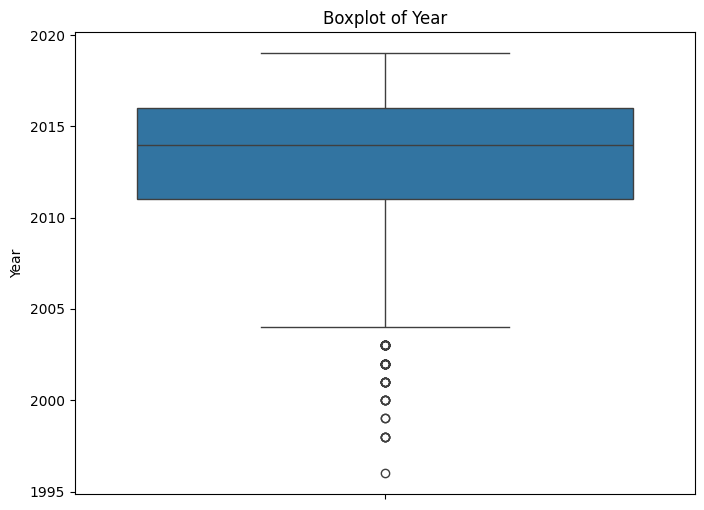

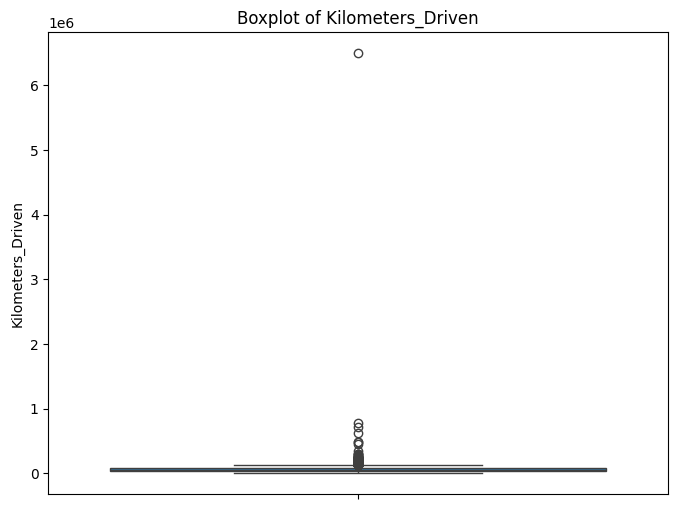

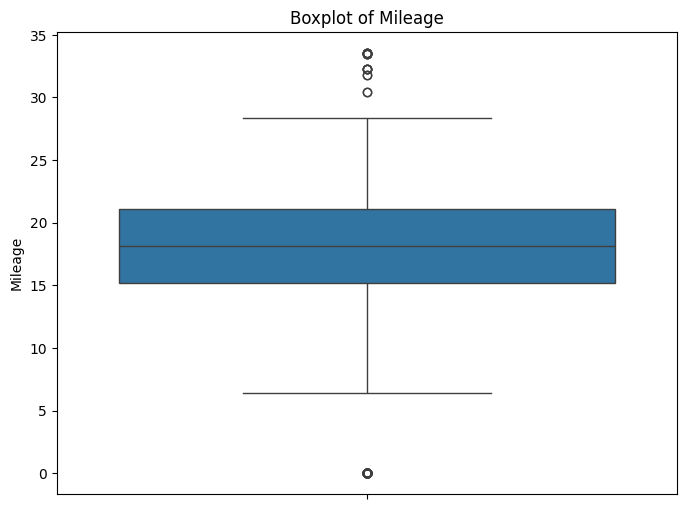

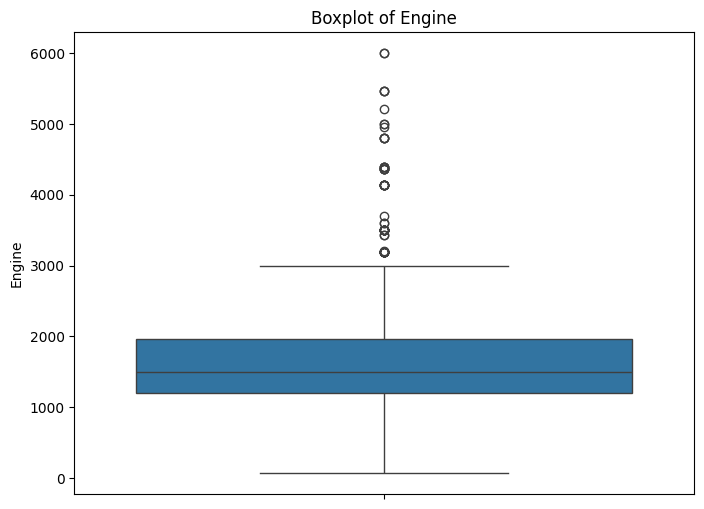

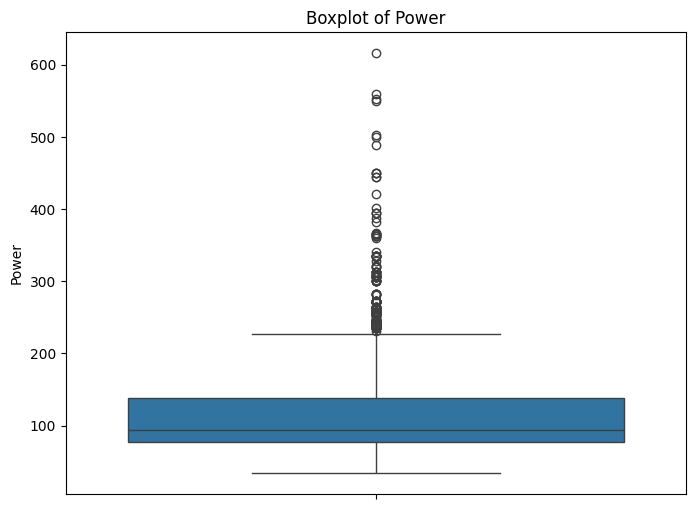

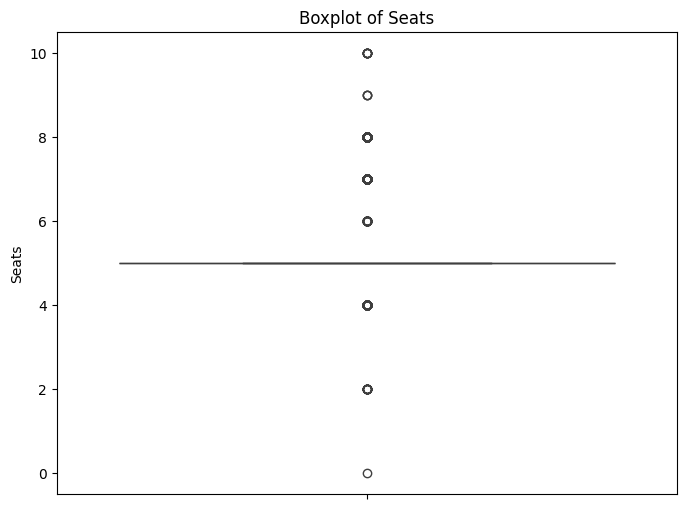

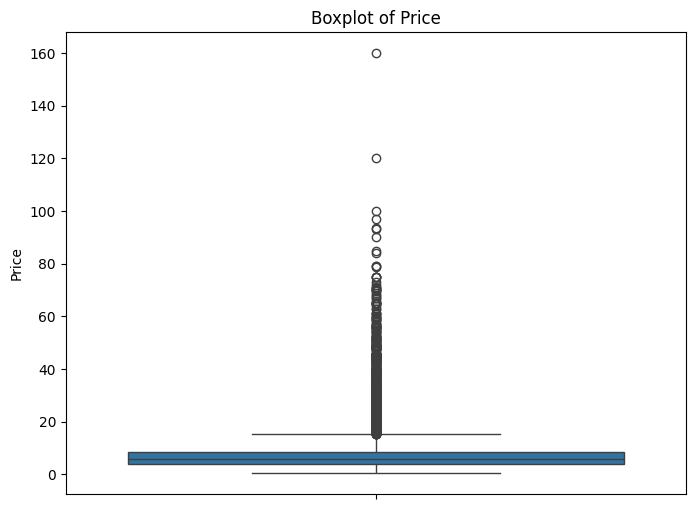


Scatter Plots for Outlier Detection:


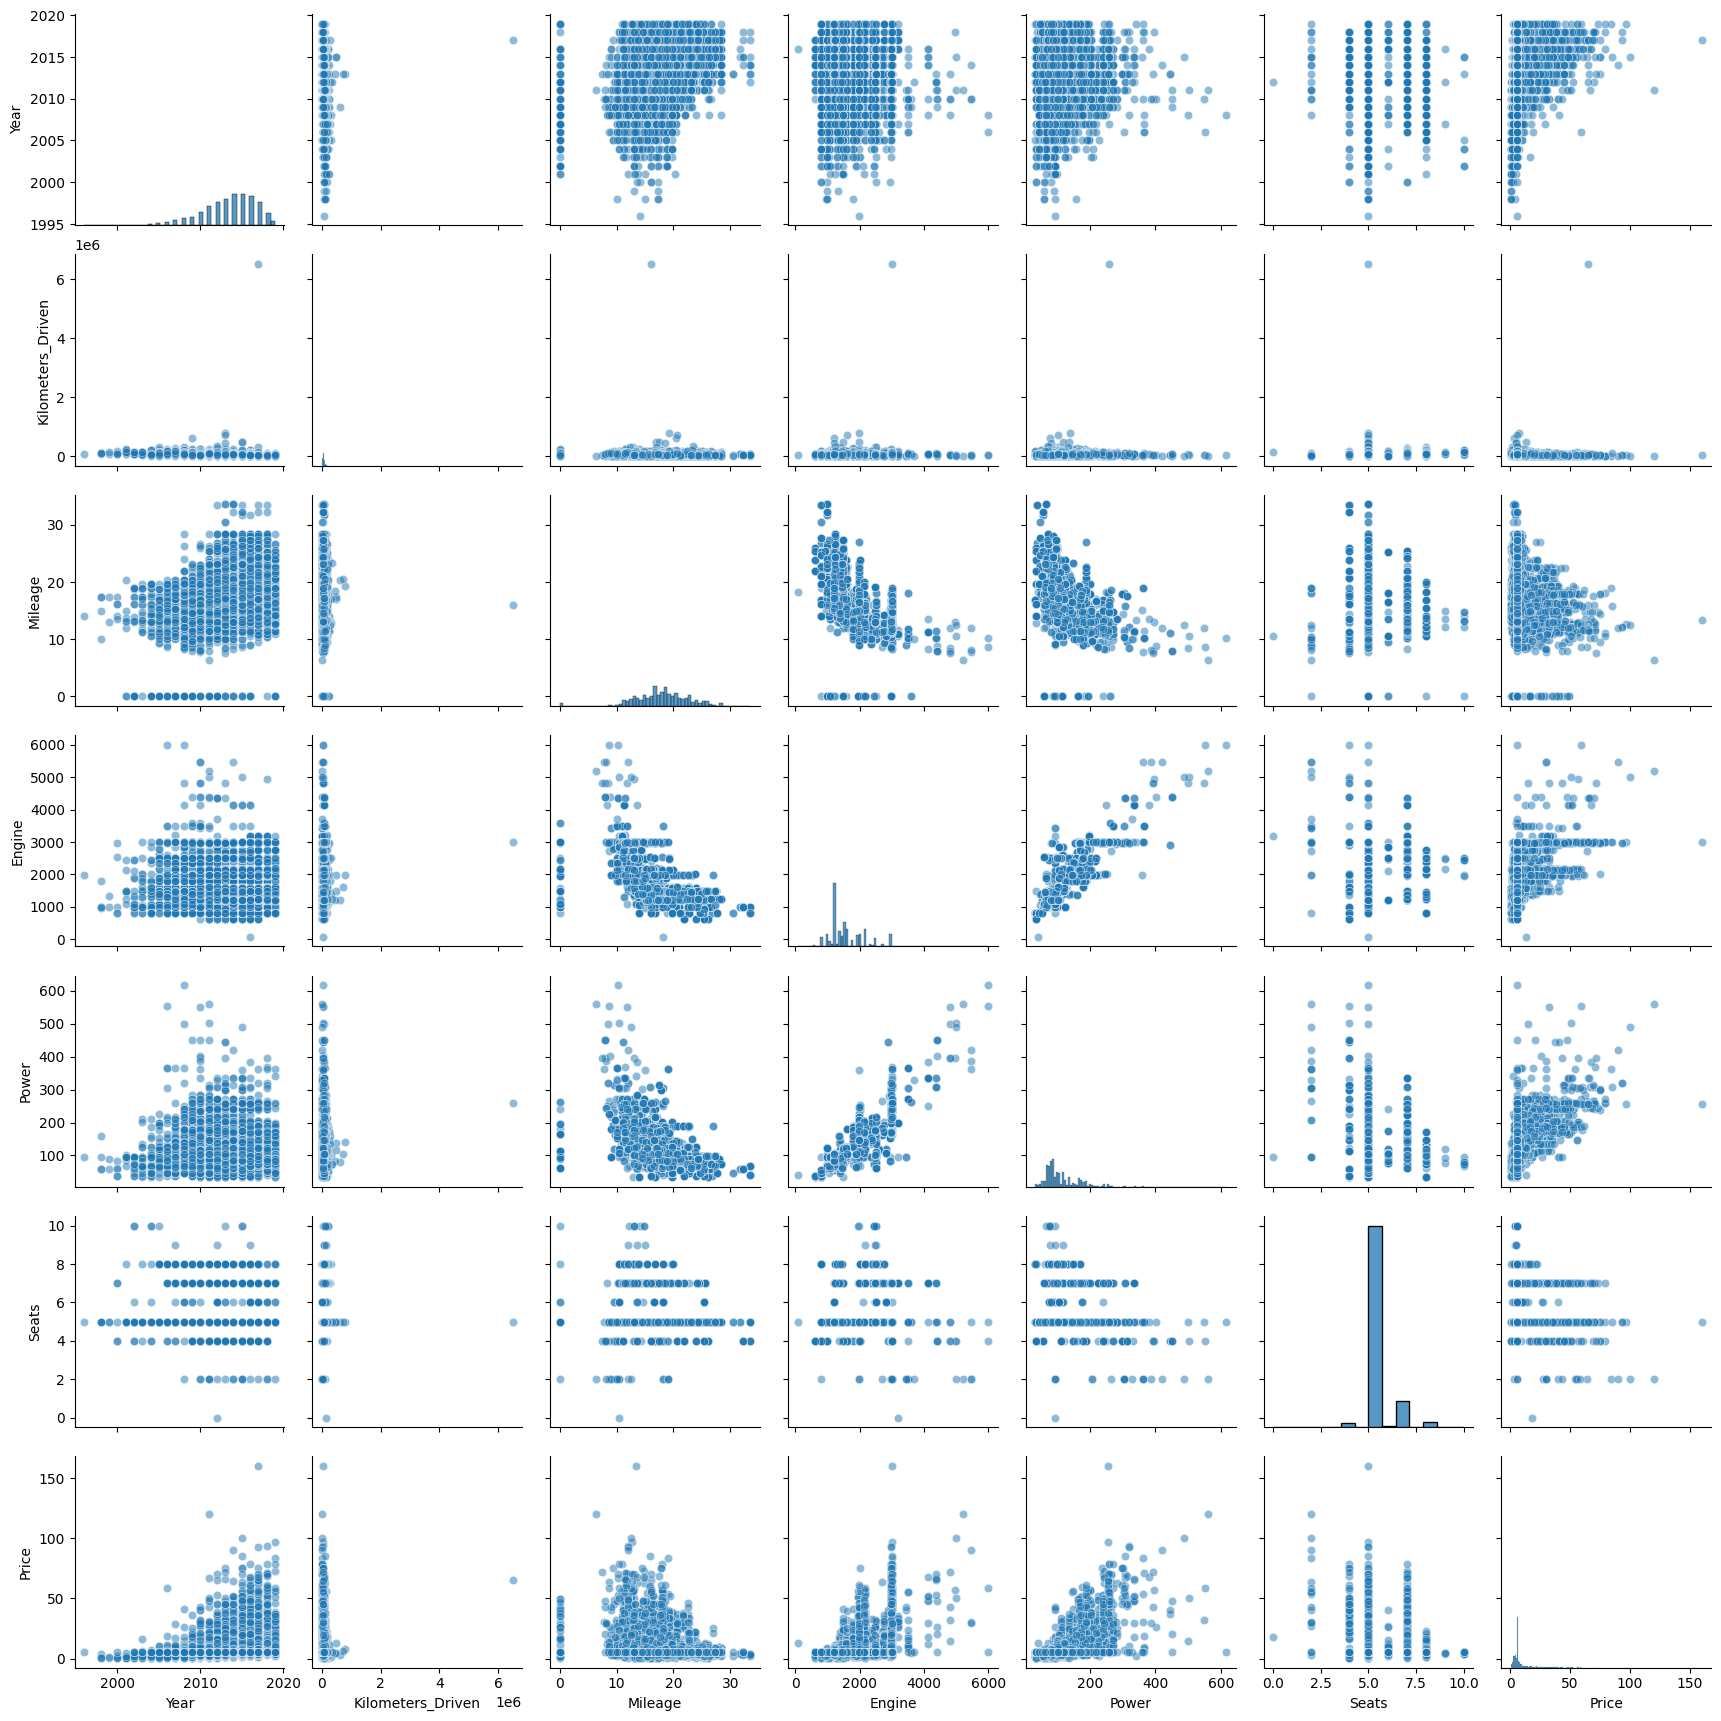


Identifying Outliers Using Z-Score Method:

Outliers detected using Z-score method (threshold = 3):
Year                  58
Kilometers_Driven      8
Mileage               95
Engine                48
Power                 82
Seats                  0
Price                178
dtype: int64

Handling Outliers by Capping (Column-Specific):
Kilometers_Driven: Lower Bound = 4073.0800000000004, Upper Bound = 173489.99999999977
Mileage: Lower Bound = 0.0, Upper Bound = 28.09
Engine: Lower Bound = 796.0, Upper Bound = 2996.0
Power: Lower Bound = 40.3, Upper Bound = 276.7088999999979
Seats: Lower Bound = 1, Upper Bound = 8
Price: Lower Bound = 0.99, Upper Bound = 53.462799999999845

Boxplots After Handling Outliers (Capping):


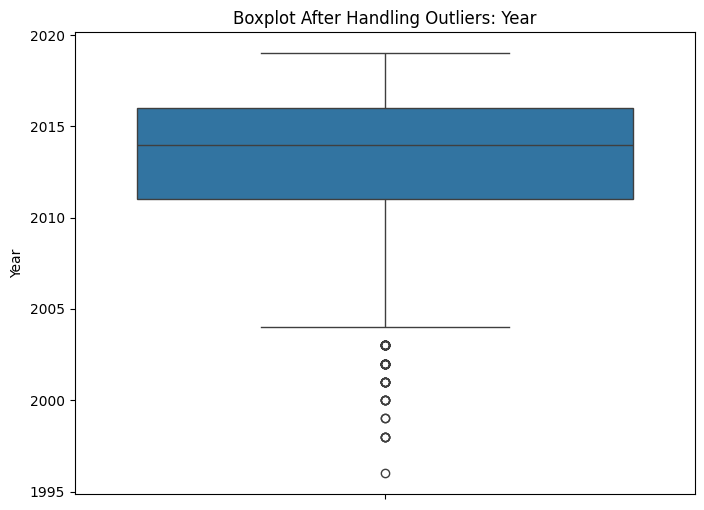

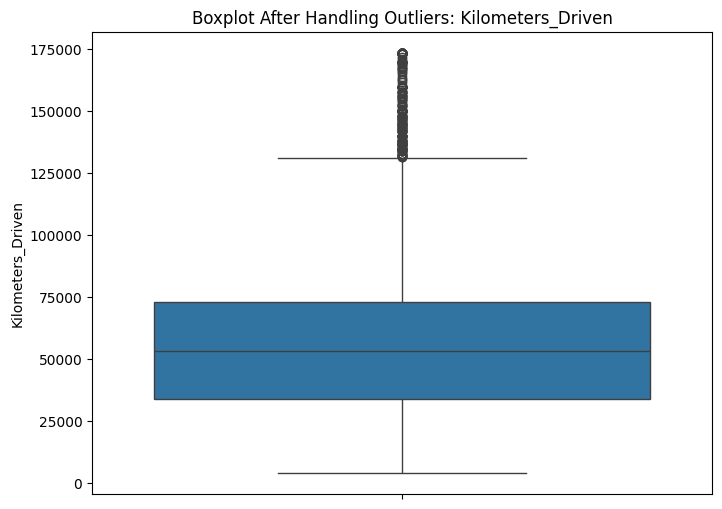

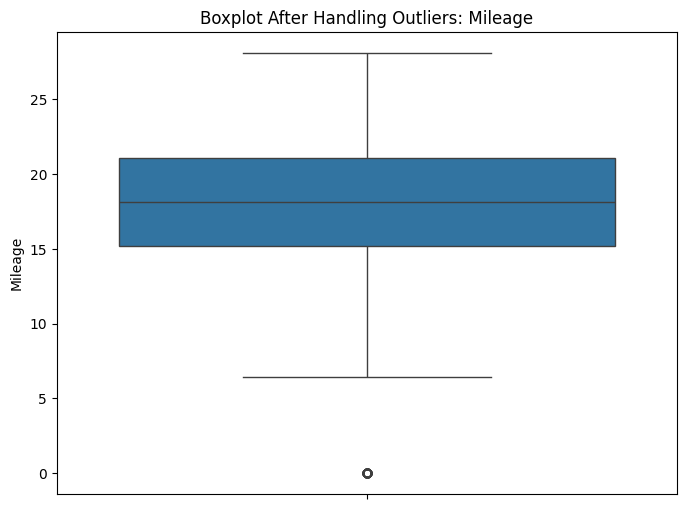

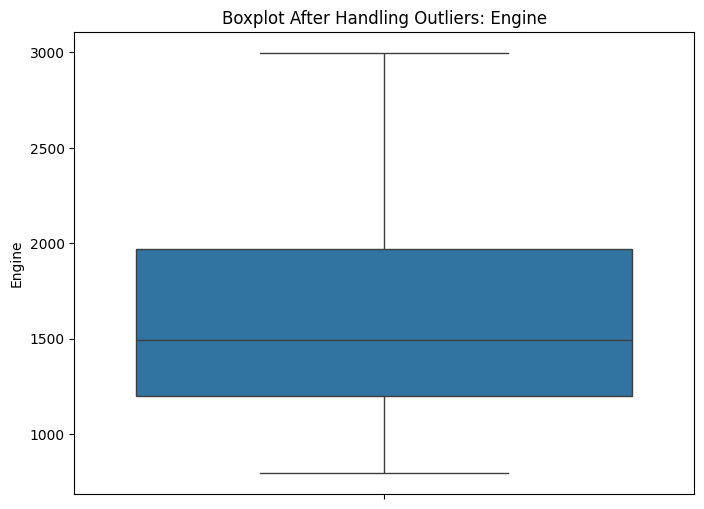

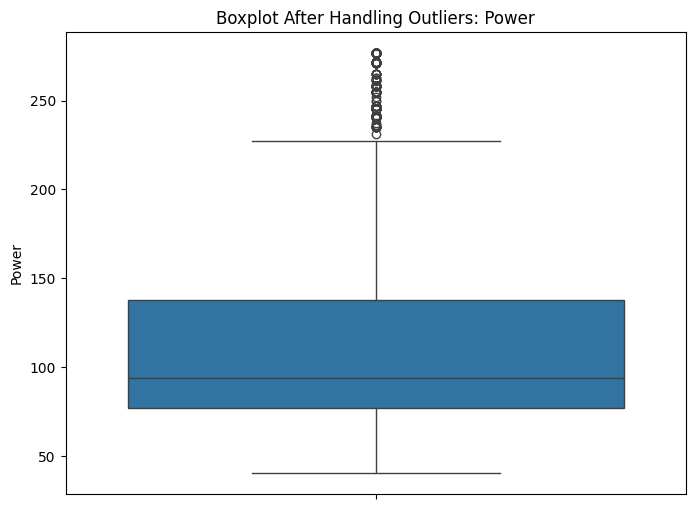

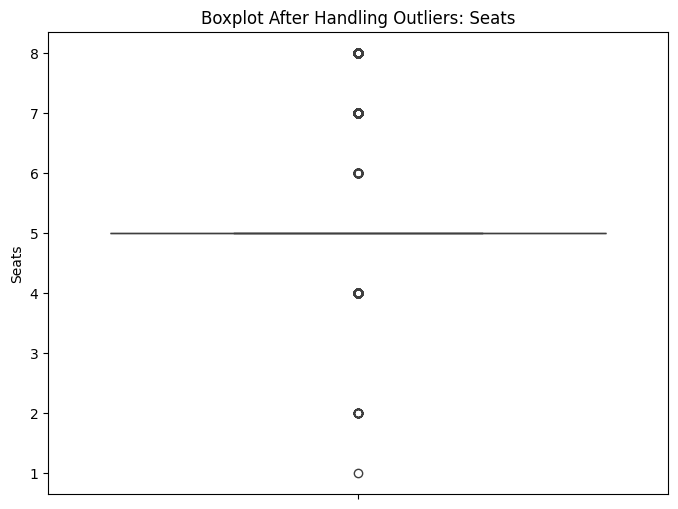

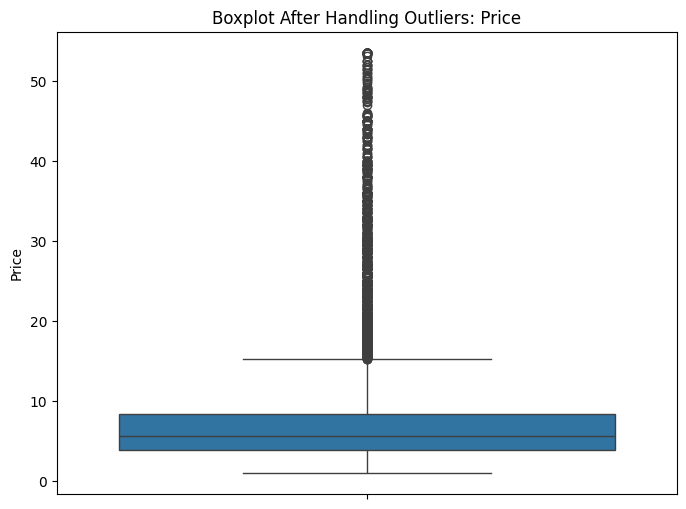

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming 'data' is your DataFrame
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# 1. Boxplots for Outlier Detection
print("\nBoxplots for Outlier Detection:")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 2. Scatter Plots to Detect Outliers (pairwise relationships)
print("\nScatter Plots for Outlier Detection:")
sns.pairplot(data[numerical_cols], plot_kws={'alpha': 0.5})
plt.show()

# 3. Identifying Outliers Using Z-Score Method
print("\nIdentifying Outliers Using Z-Score Method:")
# Calculate Z-scores
z_scores = pd.DataFrame(zscore(data[numerical_cols]), columns=numerical_cols)

# Detecting outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3).sum()
print(f"\nOutliers detected using Z-score method (threshold = 3):")
print(outliers)

# 4. Handling Outliers: Column-Specific Capping
print("\nHandling Outliers by Capping (Column-Specific):")

# Create a copy of the original data for capping
data_capped = data.copy()

# Column-specific outlier handling
for col in numerical_cols:
    if col == 'Year':  # No significant outliers detected
        data_capped[col] = data[col]

    elif col == 'Kilometers_Driven':  # Cap based on 1st and 99th percentiles
        lower_bound, upper_bound = data[col].quantile([0.01, 0.99])
        data_capped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    elif col == 'Mileage':  # Cap based on realistic range (1st and 99th percentiles)
        lower_bound, upper_bound = data[col].quantile([0.01, 0.99])
        data_capped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    elif col == 'Engine':  # Cap based on 1st and 99th percentiles
        lower_bound, upper_bound = data[col].quantile([0.01, 0.99])
        data_capped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    elif col == 'Power':  # Cap based on realistic values (e.g., 1st and 99th percentiles)
        lower_bound, upper_bound = data[col].quantile([0.01, 0.99])
        data_capped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    elif col == 'Seats':  # Restrict to a realistic range (1 to 8)
        lower_bound, upper_bound = 1, 8
        data_capped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    elif col == 'Price':  # Cap based on 1st and 99th percentiles
        lower_bound, upper_bound = data[col].quantile([0.01, 0.99])
        data_capped[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# 5. Visualizing After Handling Outliers (Boxplots after Capping)
print("\nBoxplots After Handling Outliers (Capping):")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data_capped[col])
    plt.title(f'Boxplot After Handling Outliers: {col}')
    plt.show()


In [135]:
# Outlier Detection Using Z-Score Method:

# A high number of outliers were detected in several columns, especially Year (58), Mileage (95), Power (82), and Price (178).
# This shows that the dataset has a significant amount of variation or extreme values in some features.
# Outlier Capping Results:

# The bounds for capping (based on percentiles or logical limits) have successfully constrained the outlier ranges for Kilometers_Driven, Mileage, Engine, Power, and Price.
# For Seats, the logical range of 1 to 8 has been applied.
# Observations on Specific Columns:
# Kilometers_Driven:

# Lower and upper bounds seem reasonable for vehicles.
# Most values are now constrained within 4,073 to 173,490 km, which is a practical range for typical vehicles.
# Mileage:

# The upper cap of 28.09 seems fine for fuel efficiency, but values capped at 0.0 might represent missing or invalid data. You might want to replace zeros with a more reasonable value (e.g., the mean or median of the column).
# Engine:

# Values are restricted to 796-2996 cc, which is a realistic range for most vehicles.
# Power:

# A logical range (40.3-276.7) has been applied, removing extremely high or low horsepower values.
# Seats:

# No outliers were detected. Capping within 1-8 ensures consistency with domain knowledge.
# Price:

# Lower bound (0.99) seems fine if prices below that are invalid.
# Upper bound (53.46) effectively limits extreme outliers for the Price column.

1. Group the data by `Location` and calculate the average `Price` for each location.  

In [137]:
# Group by 'Location' and calculate the average price on data_capped
avg_price_by_location = data_capped.groupby('Location')['Price'].mean()

# Print the average price for each location
print("Average Price by Location (on cleaned data):")
print(avg_price_by_location)

# Add this as a new feature in data_capped
data_capped['Avg_Price_Location'] = data_capped['Location'].map(avg_price_by_location)


Average Price by Location (on cleaned data):
Location
Ahmedabad      7.821028
Bangalore     11.559278
Chennai        7.317918
Coimbatore    13.126005
Delhi          8.827556
Hyderabad      8.929166
Jaipur         5.793407
Kochi         10.103696
Kolkata        5.609998
Mumbai         8.718892
Pune           6.506870
Name: Price, dtype: float64


2. Group the data by `Fuel_Type` and `Transmission` to find the total number of `Seats` for each combination. 

In [139]:
# Grouping by 'Fuel_Type' and 'Transmission' and summing up 'Seats'
total_seats_by_combination = data_capped.groupby(['Fuel_Type', 'Transmission'])['Seats'].sum()

# Display the result
print("Total number of Seats by Fuel_Type and Transmission:")
print(total_seats_by_combination)

# Optional: Resetting the index to convert the result into a DataFrame
total_seats_by_combination_df = total_seats_by_combination.reset_index()
total_seats_by_combination_df.columns = ['Fuel_Type', 'Transmission', 'Total_Seats']

# Print the formatted DataFrame
print("\nFormatted DataFrame:")
print(total_seats_by_combination_df)


Total number of Seats by Fuel_Type and Transmission:
Fuel_Type  Transmission
CNG        Manual            309.0
Diesel     Automatic        6965.0
           Manual          14171.0
Electric   Automatic          10.0
LPG        Manual             60.0
Petrol     Automatic        3572.0
           Manual          12904.0
Name: Seats, dtype: float64

Formatted DataFrame:
  Fuel_Type Transmission  Total_Seats
0       CNG       Manual        309.0
1    Diesel    Automatic       6965.0
2    Diesel       Manual      14171.0
3  Electric    Automatic         10.0
4       LPG       Manual         60.0
5    Petrol    Automatic       3572.0
6    Petrol       Manual      12904.0


3. Create a pivot table to display the average `Power` for each `Year` and `Owner_Type`.

Pivot Table: Average Power by Year and Owner_Type
Owner_Type       First  Fourth & Above      Second       Third
Year                                                          
1996               NaN             NaN   94.000000         NaN
1998        157.700000             NaN   94.000000   60.000000
1999         90.000000             NaN   60.000000         NaN
2000         47.866667             NaN   71.550000         NaN
2001         94.000000           94.00   97.000000   82.600000
2002         74.050000           94.00   64.460000   76.683333
2003         91.266667             NaN  106.588889   65.260000
2004        104.075000             NaN   83.457895   77.150000
2005        109.457576           71.15   94.448148   95.500000
2006        101.547717           94.00   99.490200   99.292308
2007        102.387792          122.50   96.179038  112.712288
2008         99.265544          116.75  112.895890  147.523762
2009        116.548743           75.00  124.189865  117.952941
2010 

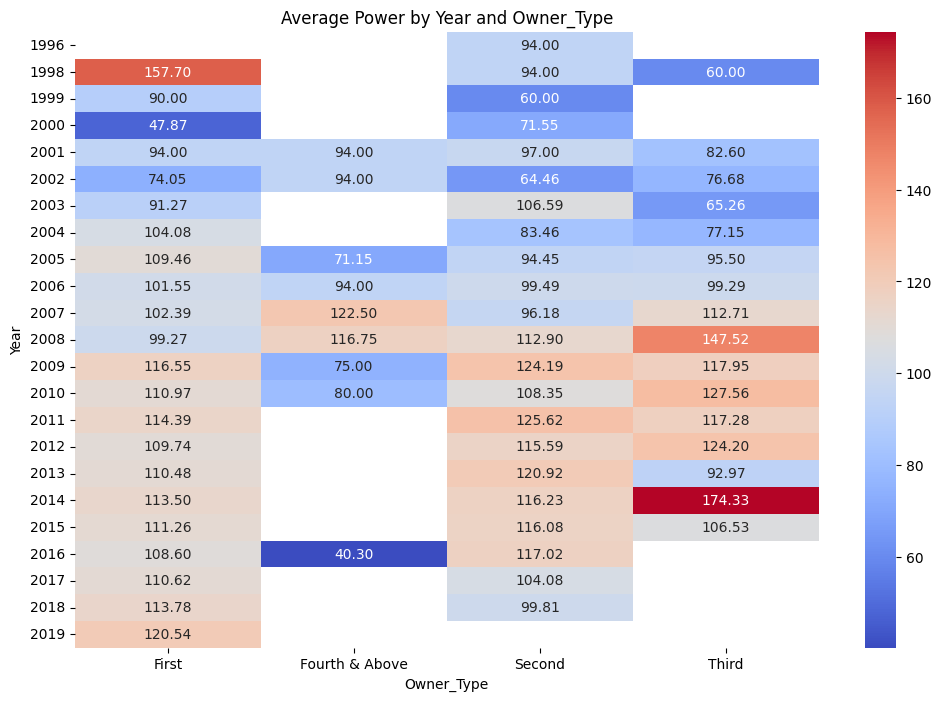

In [140]:
# Creating a pivot table for average Power by Year and Owner_Type
pivot_table_power = data_capped.pivot_table(
    values='Power', 
    index='Year', 
    columns='Owner_Type', 
    aggfunc='mean'
)

# Display the pivot table
print("Pivot Table: Average Power by Year and Owner_Type")
print(pivot_table_power)

# Optional: Display the pivot table as a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_power, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Power by Year and Owner_Type")
plt.xlabel("Owner_Type")
plt.ylabel("Year")
plt.show()


<!-- This histogram shows the distribution of the Price column in your dataset, with the following observations:

Right-Skewed Distribution:
The majority of cars are priced on the lower end (close to 0–20), with very few vehicles having prices above 50. This indicates that most cars in the dataset are relatively affordable, with only a few luxury or expensive vehicles.

Frequency Counts:

The y-axis represents the count (frequency) of cars within each price range (bin).
The x-axis represents the price of the cars.
For example, there are over 2000 cars with prices in the lowest range (between 0–5).
Outliers:
A small number of cars are in the very high price range (e.g., >100), which might indicate outliers or luxury vehicles. -->

4. Create a pivot table to show the total `Kilometers_Driven` for each `Location` and `Fuel_Type`. 

Pivot Table: Total Kilometers_Driven by Location and Fuel_Type
Fuel_Type        CNG       Diesel  Electric       LPG       Petrol
Location                                                          
Ahmedabad   200001.0  10089813.08       NaN       NaN   4915274.16
Bangalore    43985.0  16185760.00       NaN       NaN   8618021.24
Chennai     121000.0  28409922.16   50000.0       NaN  14958937.00
Coimbatore       NaN  22469409.00       NaN       NaN  13826945.16
Delhi       688147.0  21339641.08       NaN       NaN  15253284.00
Hyderabad   271512.0  45802568.32       NaN  357436.0  14702886.40
Jaipur           NaN  21803757.16       NaN  250829.0  13290407.24
Kochi       412768.0  18053113.08       NaN       NaN  16590106.16
Kolkata      14311.0  15175655.40       NaN       NaN  12398571.80
Mumbai      723453.0  20248119.48   44000.0   64226.0  22217096.28
Pune        825017.0  30708695.08       NaN   55000.0  23311668.56


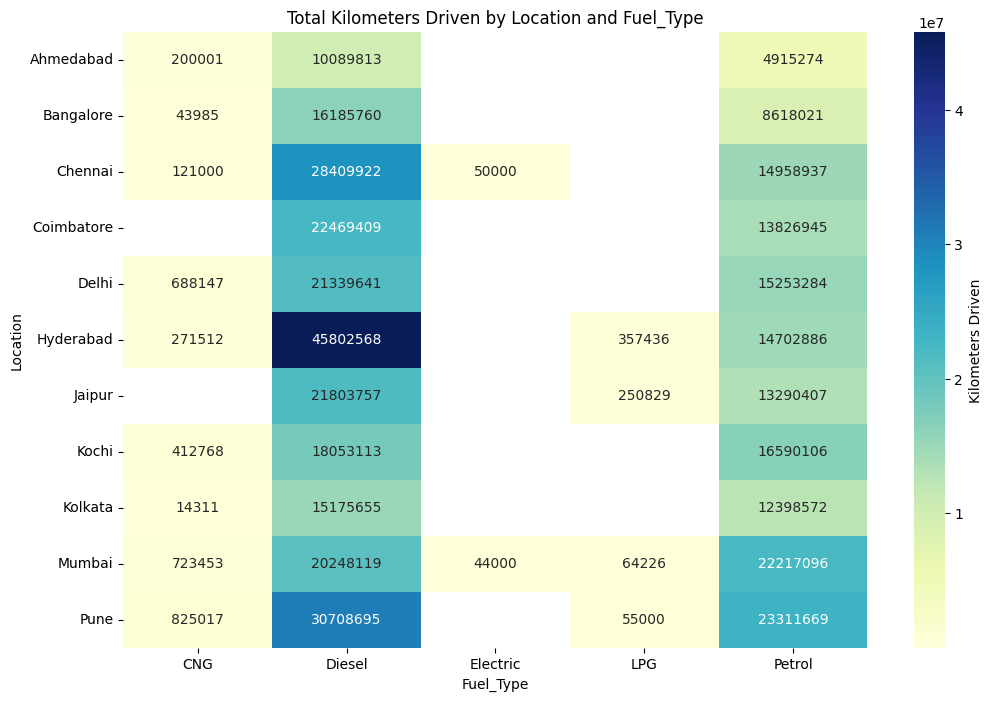

In [141]:
# Creating a pivot table for total Kilometers_Driven by Location and Fuel_Type
pivot_table_km = data_capped.pivot_table(
    values='Kilometers_Driven',
    index='Location',
    columns='Fuel_Type',
    aggfunc='sum'
)

# Display the pivot table
print("Pivot Table: Total Kilometers_Driven by Location and Fuel_Type")
print(pivot_table_km)

# Optional: Visualization as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_km, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Kilometers Driven'})
plt.title("Total Kilometers Driven by Location and Fuel_Type")
plt.xlabel("Fuel_Type")
plt.ylabel("Location")
plt.show()


5. Filter the dataset to include only cars with `Mileage` above 20 km/l and calculate the average `Price` of these cars. 

In [142]:
# Filter the dataset for cars with Mileage > 20 km/l
high_mileage_cars = data_capped[data_capped['Mileage'] > 20]

# Calculate the average Price of these cars
average_price_high_mileage = high_mileage_cars['Price'].mean()

# Display the result
print(f"Average Price of cars with Mileage above 20 km/l: {average_price_high_mileage:.2f}")


Average Price of cars with Mileage above 20 km/l: 5.82


6. Add a new column, `Car_Age`, to calculate the age of each car as of 2024 and find the oldest car.  

In [143]:
import datetime

# Add a new column 'Car_Age'
current_year = 2024
data_capped['Car_Age'] = current_year - data_capped['Year']

# Find the oldest car
oldest_car = data_capped.loc[data_capped['Car_Age'].idxmax()]

# Display the result
print(f"The oldest car is:\n{oldest_car[['Name', 'Year', 'Car_Age', 'Location']]}")


The oldest car is:
Name        Hindustan Motors Contessa 2.0 DSL
Year                                     1996
Car_Age                                    28
Location                                 Pune
Name: 6216, dtype: object


7. Sort the dataset by `Price` in descending order and list the top 5 most expensive cars.  

In [144]:
# Sort the dataset by 'Price' in descending order
top_5_expensive_cars = data_capped.sort_values(by='Price', ascending=False).head(5)

# Display the top 5 most expensive cars
print("Top 5 Most Expensive Cars:")
print(top_5_expensive_cars[['Name', 'Location', 'Fuel_Type', 'Transmission', 'Price']])


Top 5 Most Expensive Cars:
                                   Name    Location Fuel_Type Transmission  \
1984                 BMW 7 Series 740Li   Bangalore    Petrol    Automatic   
2319      Mercedes-Benz E-Class E 350 d  Coimbatore    Diesel    Automatic   
3268             Mercedes-Benz GLE 350d  Coimbatore    Diesel    Automatic   
1336  Audi Q7 45 TDI Quattro Technology      Mumbai    Diesel    Automatic   
418      Mercedes-Benz GLC 43 AMG Coupe  Coimbatore    Petrol    Automatic   

        Price  
1984  53.4628  
2319  53.4628  
3268  53.4628  
1336  53.4628  
418   53.4628  


### Transformations

By transforming your data, you align it better with the assumptions of models and algorithms, ultimately improving performance, interpretability, and fairness in your analysis.

Step 1: Inspect the Distribution

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


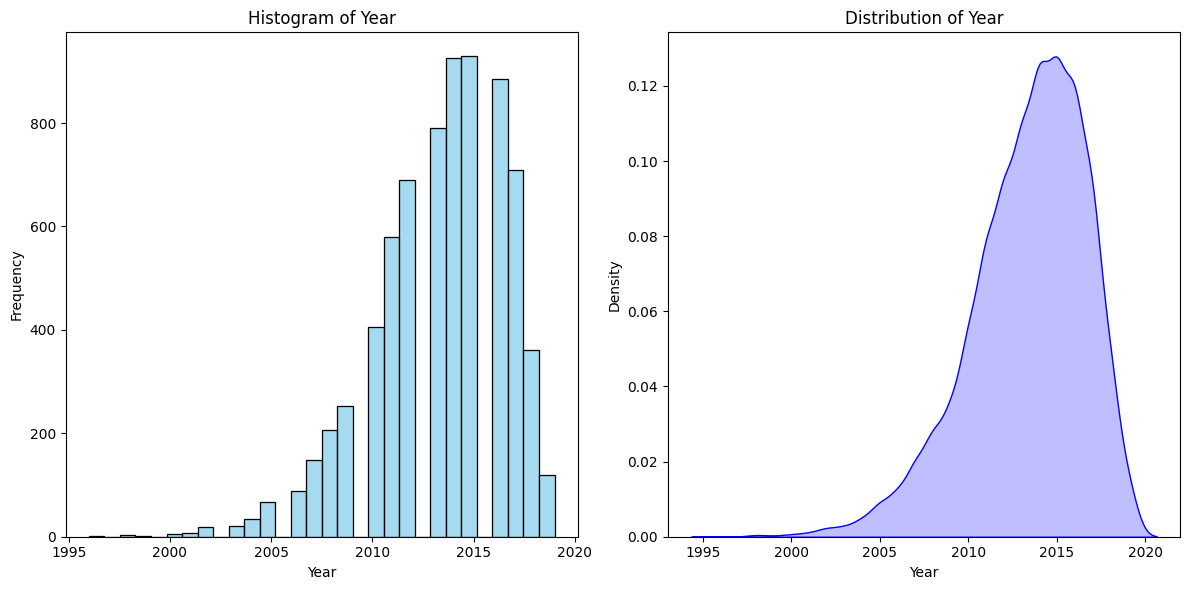

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


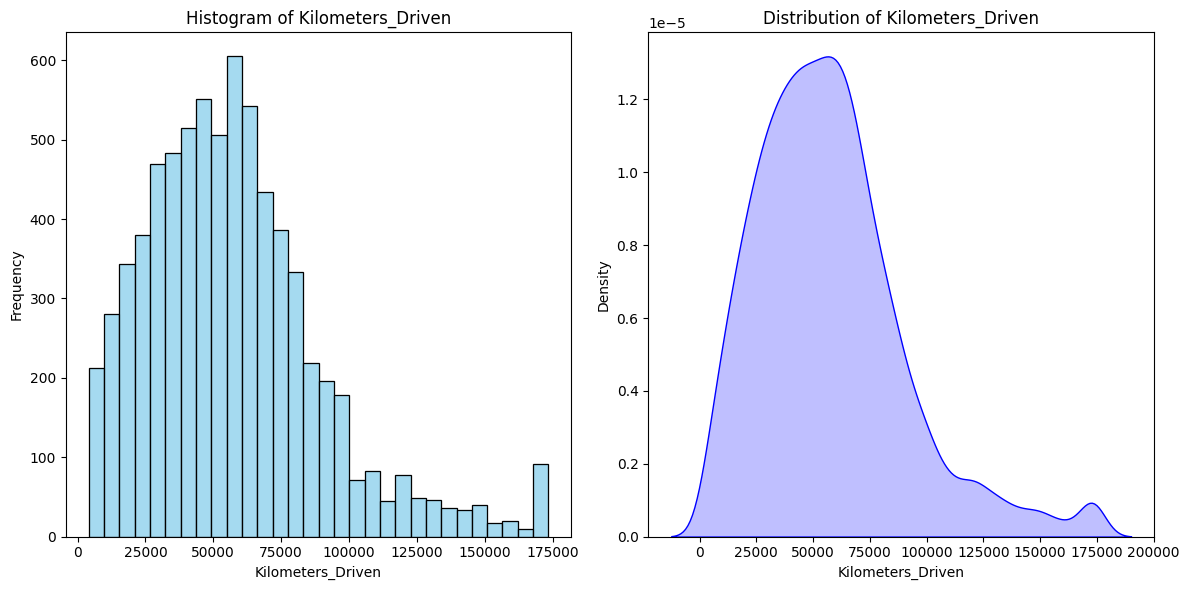

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


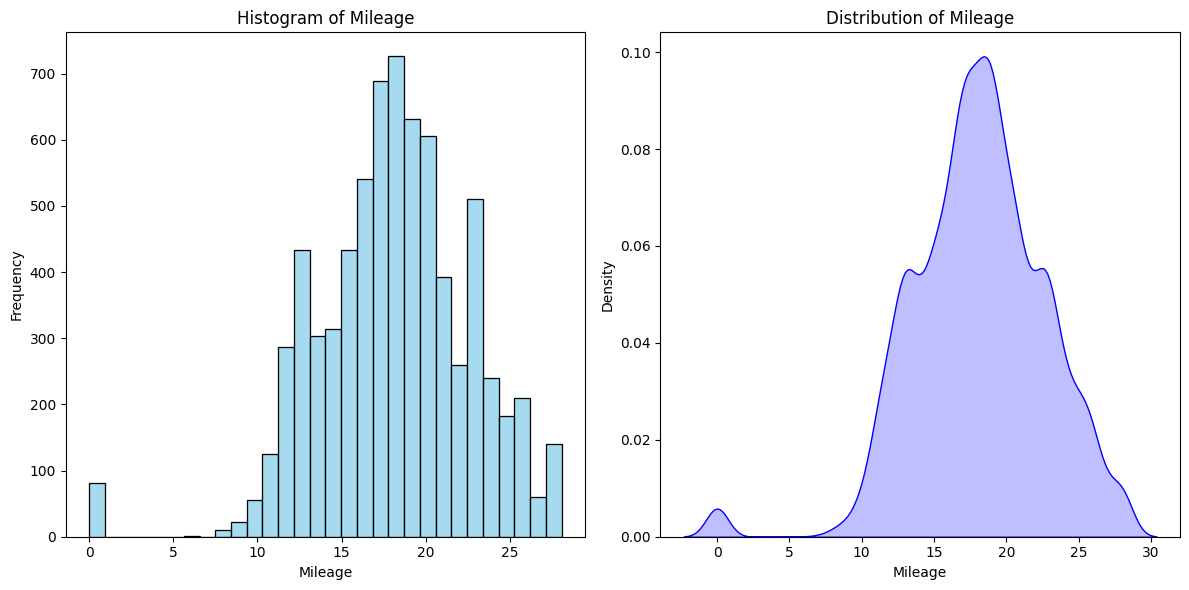

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


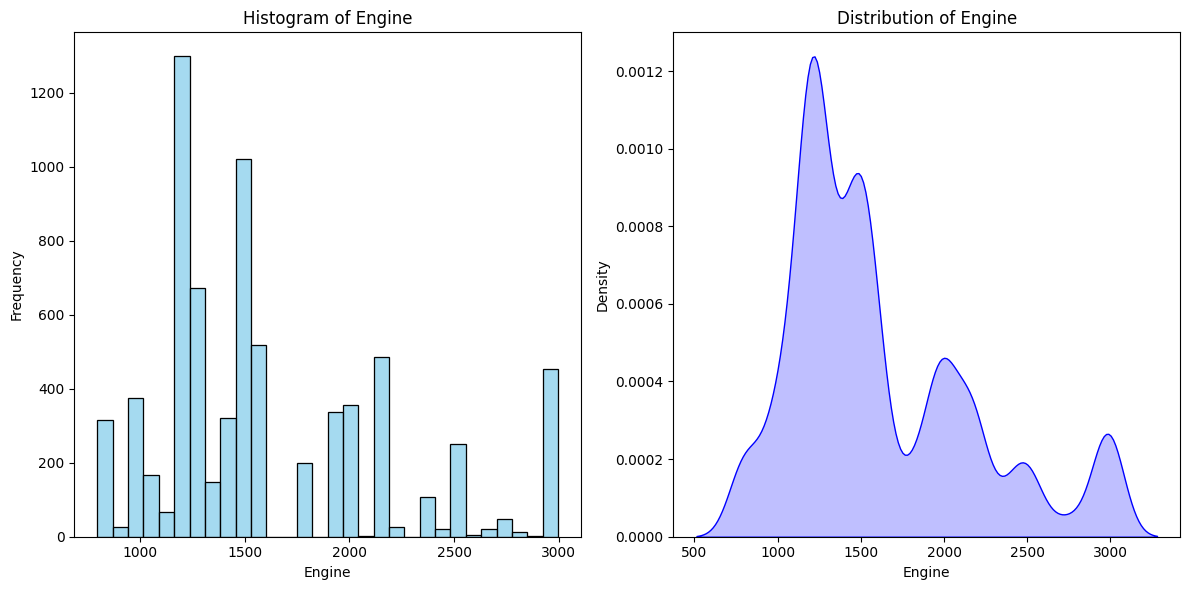

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


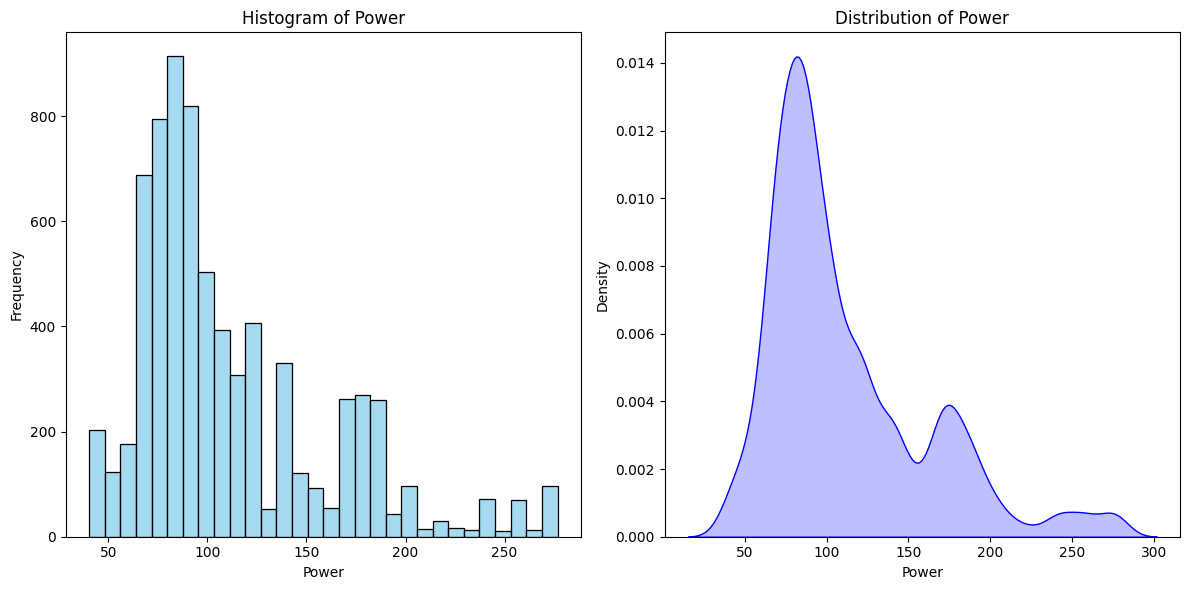

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


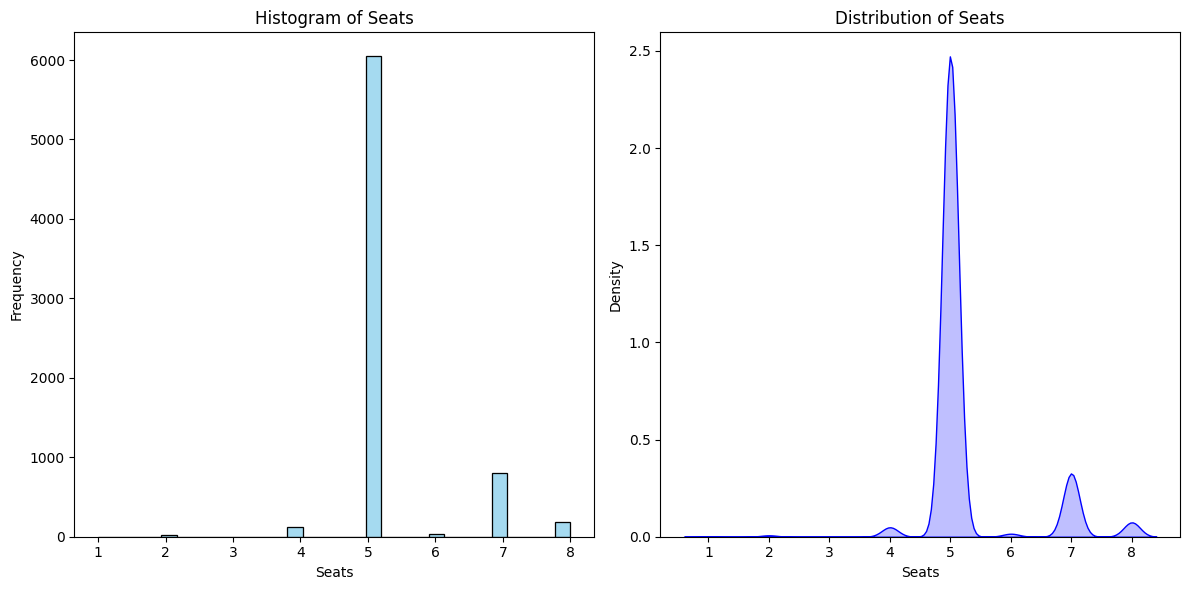

C:\Users\seshu\AppData\Local\Temp\ipykernel_27812\521165428.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_capped[col], shade=True, color='blue')


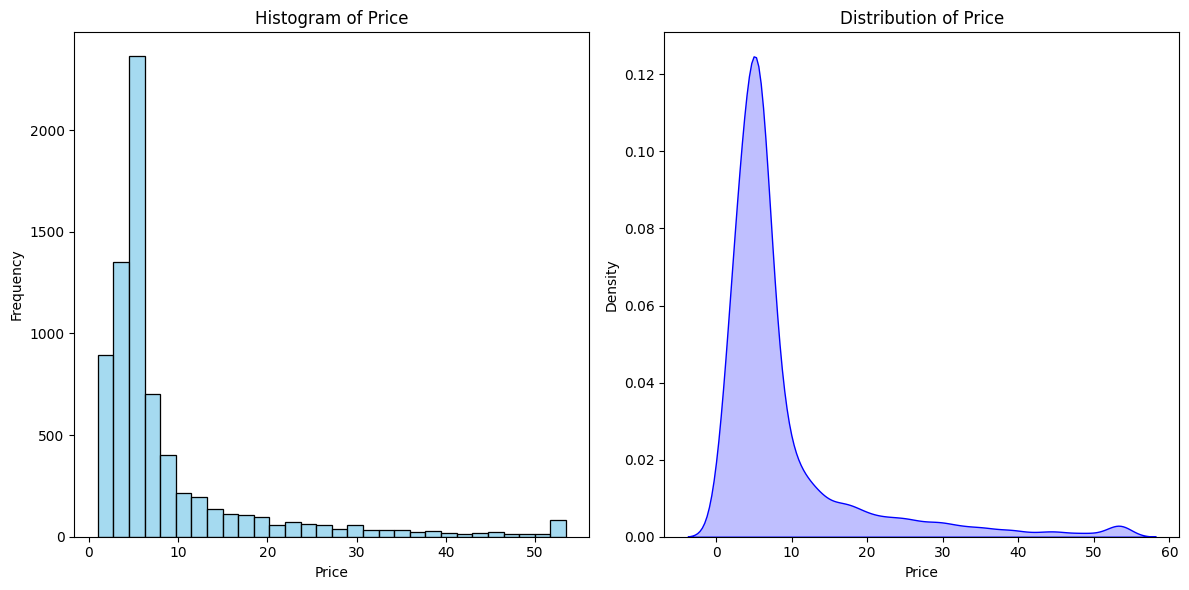

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns to visualize
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Plot histograms and KDE plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_capped[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data_capped[col], shade=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


In [148]:
# Check skewness for each numerical column
skewness = data_capped[numerical_cols].skew()

# Print the skewness values
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Year                -0.840219
Kilometers_Driven    1.051099
Mileage             -0.502405
Engine               0.989074
Power                1.284932
Seats                1.811775
Price                2.765039
dtype: float64


In [151]:
# Check the minimum value of each column
for col in numerical_cols:
    min_val = data_capped[col].min()
    print(f"{col} - Min Value: {min_val}")


Year - Min Value: 1996
Kilometers_Driven - Min Value: 4073.0800000000004
Mileage - Min Value: 0.0
Engine - Min Value: 796.0
Power - Min Value: 40.3
Seats - Min Value: 1.0
Price - Min Value: 0.99


In [152]:
# Adjust numerical columns for log and square root transformations
for col in numerical_cols:
    min_val = data_capped[col].min()
    if min_val <= 0:
        print(f"Adjusting {col} for log transformation...")
        # Shift values to make all positive and non-zero
        data_capped[col] = data_capped[col] + abs(min_val) + 1e-5

    # Apply log transformation
    data_capped[f"{col}_log"] = np.log1p(data_capped[col])

    # Apply square root transformation
    data_capped[f"{col}_sqrt"] = np.sqrt(data_capped[col])


Adjusting Mileage for log transformation...


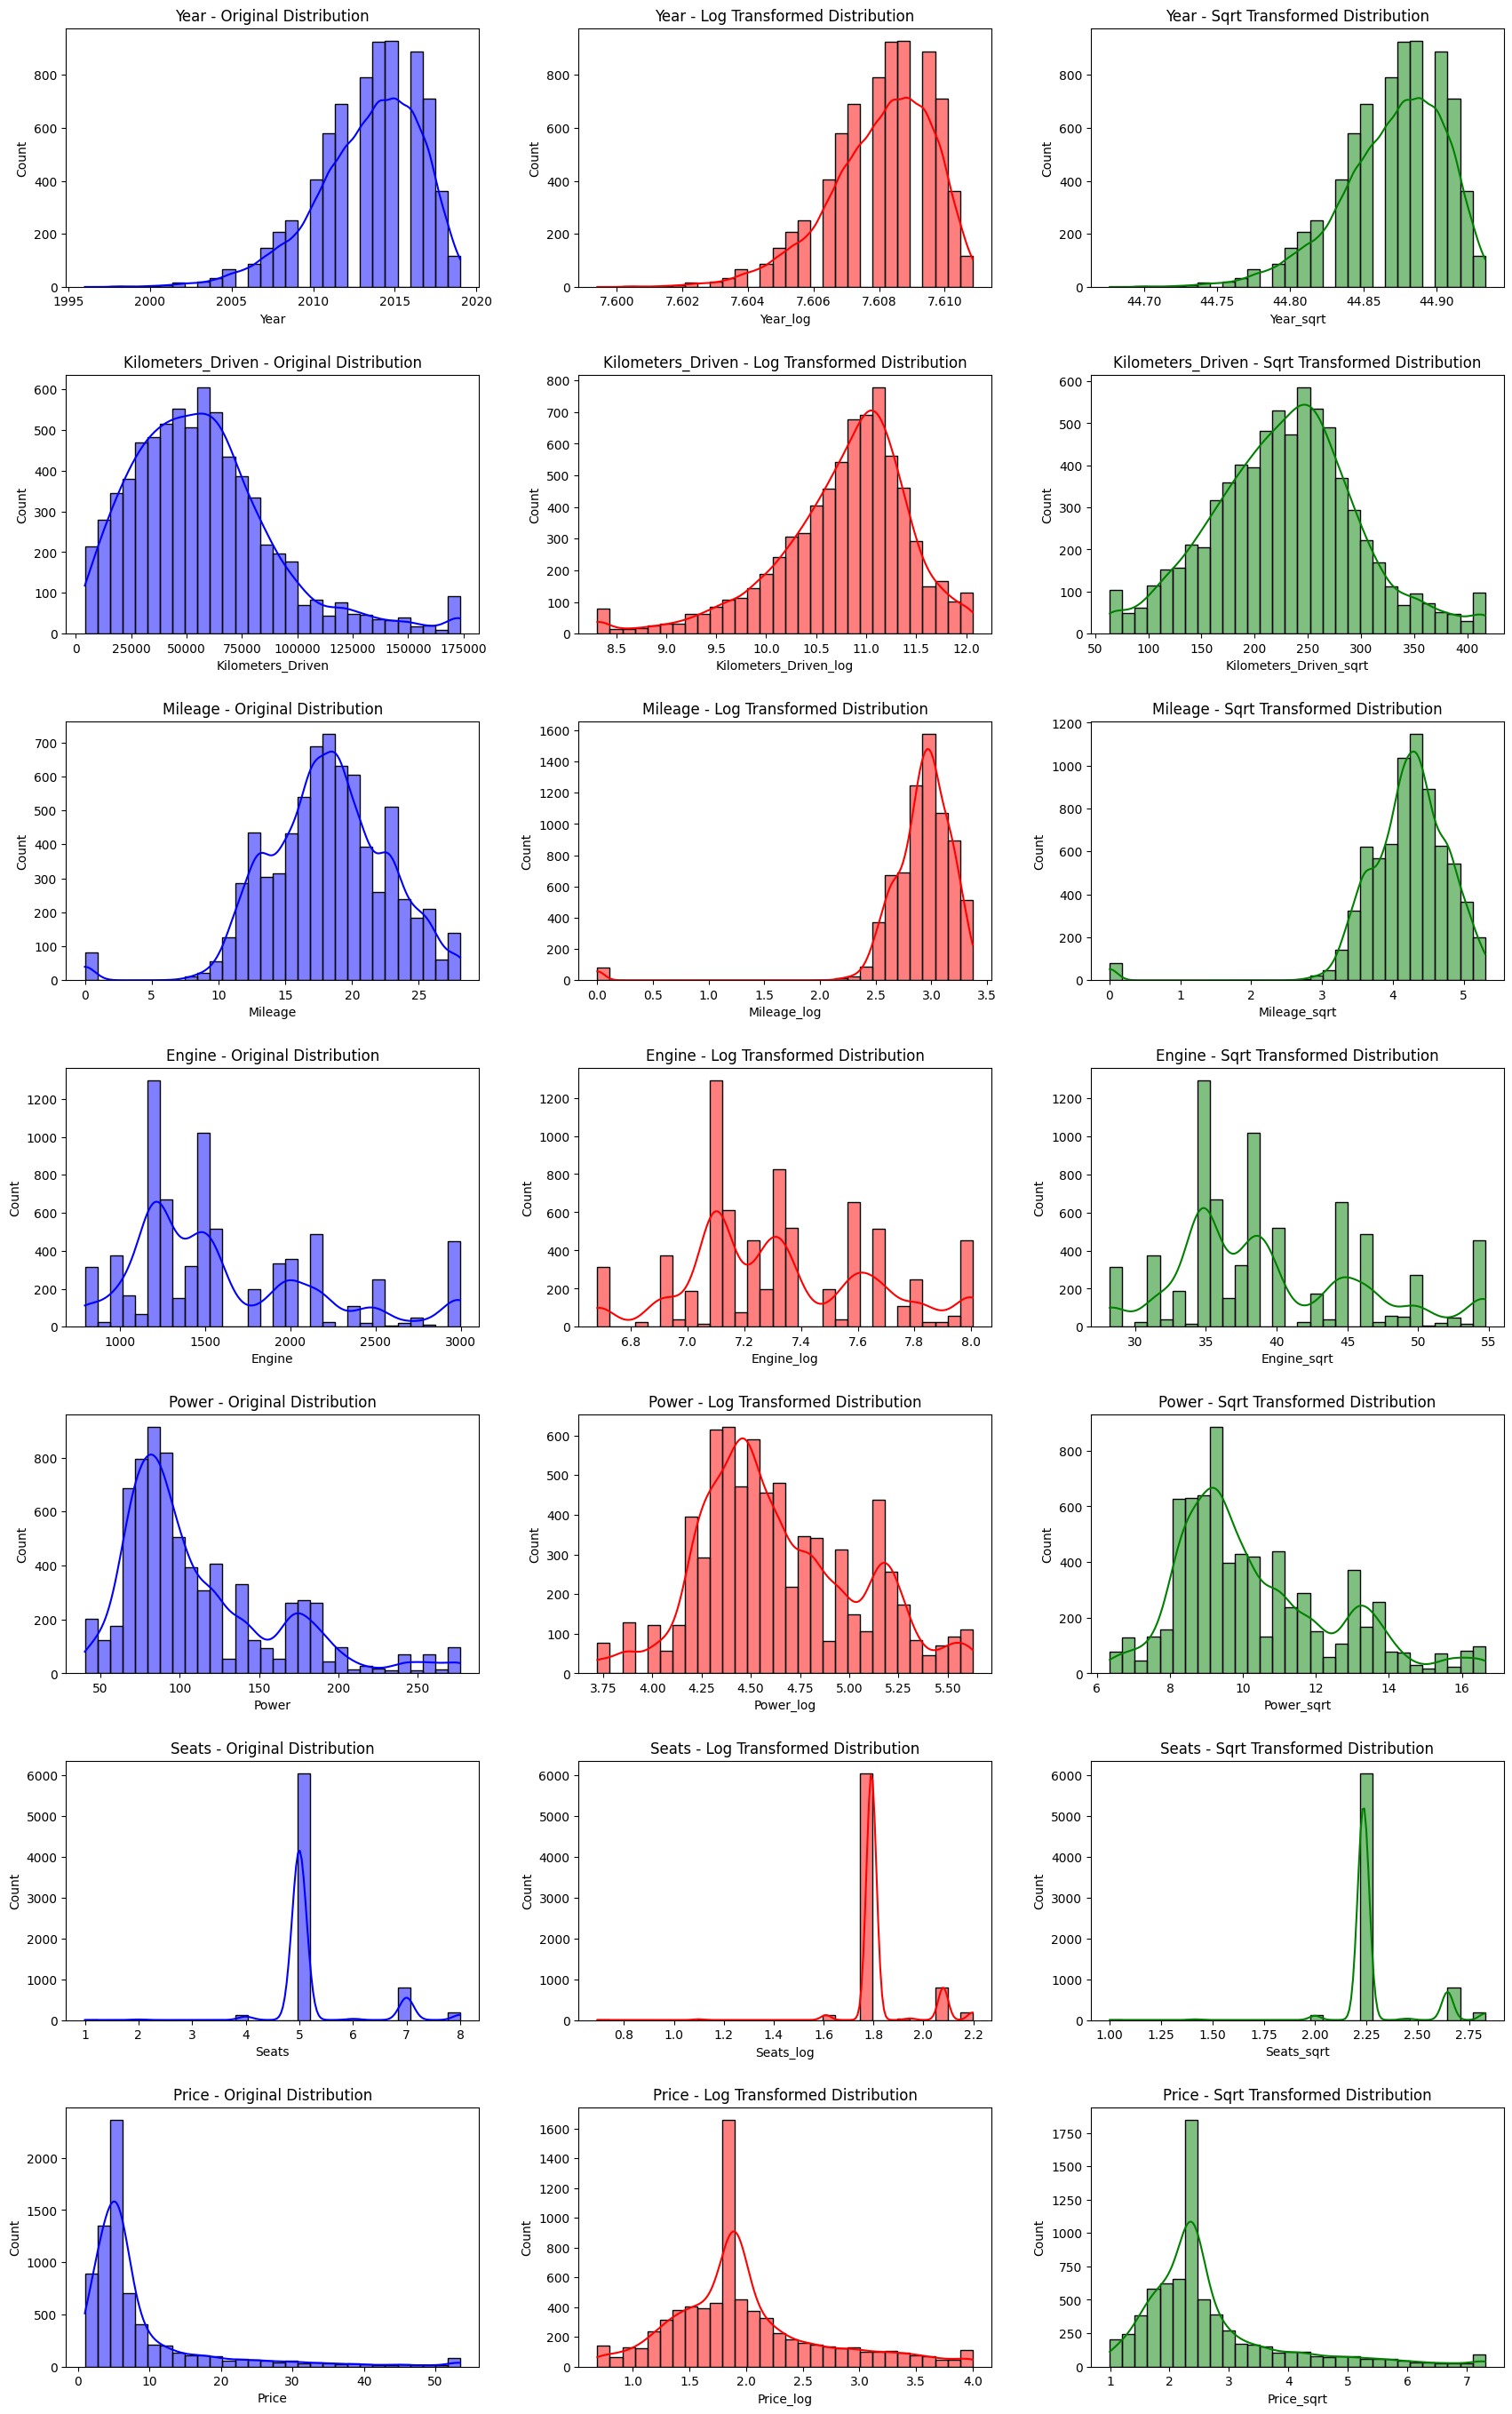

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
fig, axes = plt.subplots(len(numerical_cols), 3, figsize=(18, len(numerical_cols)*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_cols):
    # Original Data
    sns.histplot(data_capped[col], kde=True, ax=axes[i, 0], color="blue", bins=30)
    axes[i, 0].set_title(f"{col} - Original Distribution")
    axes[i, 0].set_xlabel(col)
    
    # Log Transformed Data
    sns.histplot(data_capped[f"{col}_log"], kde=True, ax=axes[i, 1], color="red", bins=30)
    axes[i, 1].set_title(f"{col} - Log Transformed Distribution")
    axes[i, 1].set_xlabel(f"{col}_log")
    
    # Square Root Transformed Data
    sns.histplot(data_capped[f"{col}_sqrt"], kde=True, ax=axes[i, 2], color="green", bins=30)
    axes[i, 2].set_title(f"{col} - Sqrt Transformed Distribution")
    axes[i, 2].set_xlabel(f"{col}_sqrt")

plt.show()


In [154]:
# Choose the final transformations based on skewness
chosen_transformations = {}
for col in numerical_cols:
    skew_original = data_capped[col].skew()
    if skew_original > 1:
        chosen_transformations[col] = "log"
        data_capped[col] = data_capped[f"{col}_log"]  # Replace with log-transformed
    elif 0.5 < skew_original <= 1:
        chosen_transformations[col] = "sqrt"
        data_capped[col] = data_capped[f"{col}_sqrt"]  # Replace with sqrt-transformed
    else:
        chosen_transformations[col] = "original"

print("Chosen Transformations:\n", chosen_transformations)


Chosen Transformations:
 {'Year': 'original', 'Kilometers_Driven': 'log', 'Mileage': 'original', 'Engine': 'sqrt', 'Power': 'log', 'Seats': 'log', 'Price': 'log'}


In [155]:
# Check skewness after final transformations
final_skewness = data_capped[numerical_cols].skew()
print("Skewness After Final Transformation:\n", final_skewness)


Skewness After Final Transformation:
 Year                -0.840219
Kilometers_Driven   -1.007380
Mileage             -0.502405
Engine               0.682094
Power                0.406576
Seats                0.963005
Price                0.878154
dtype: float64


In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = data_capped.copy()
standardized_data[numerical_cols] = scaler.fit_transform(data_capped[numerical_cols])
print("Data has been standardized successfully.")


Data has been standardized successfully.


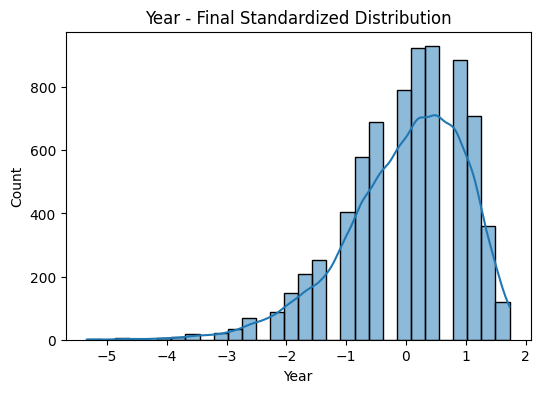

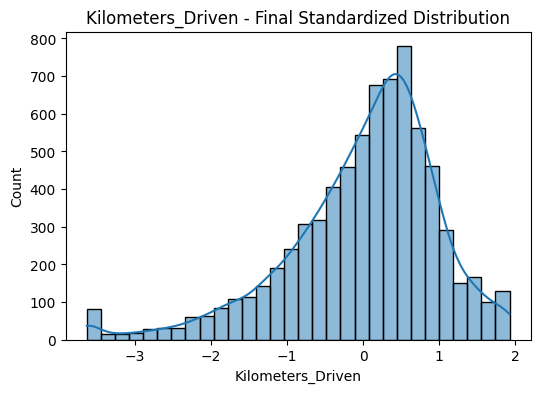

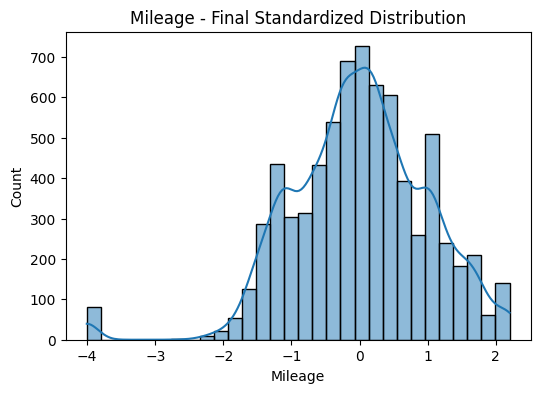

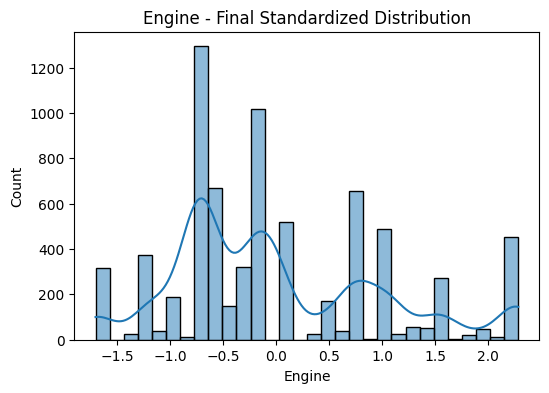

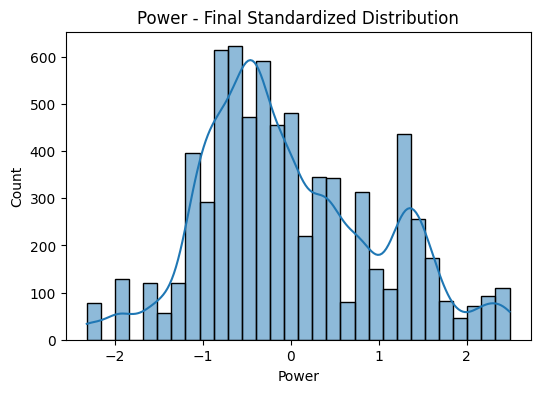

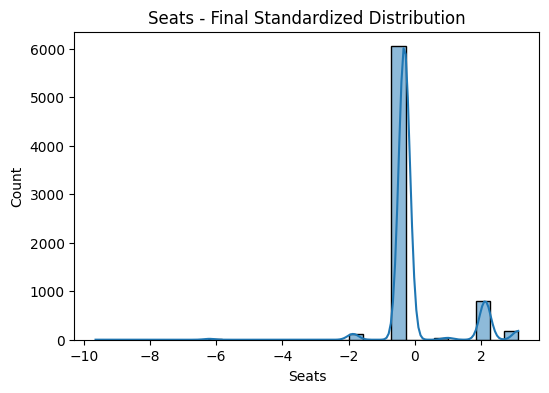

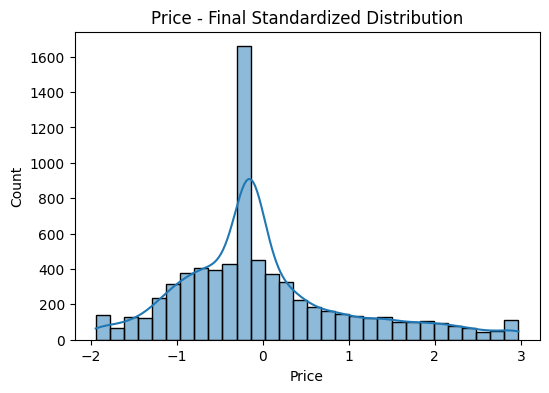

In [157]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(standardized_data[col], kde=True, bins=30)
    plt.title(f'{col} - Final Standardized Distribution')
    plt.show()


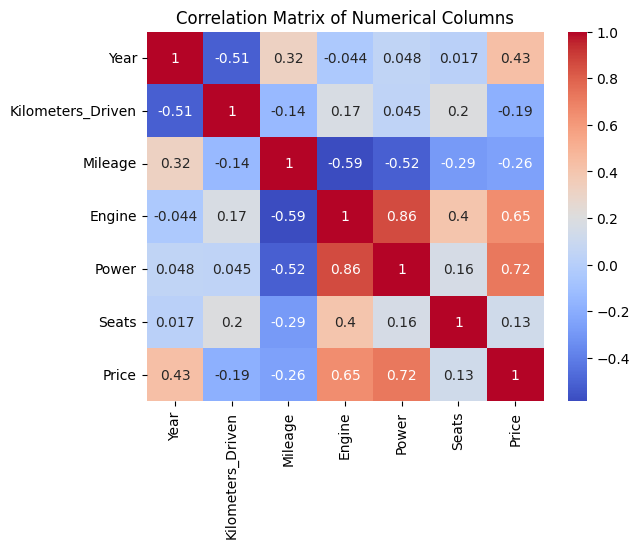

In [158]:
correlation_matrix = standardized_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()


In [159]:
standardized_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Mileage_log,Mileage_sqrt,Engine_log,Engine_sqrt,Power_log,Power_sqrt,Seats_log,Seats_sqrt,Price_log,Price_sqrt
0,Maruti Wagon R LXI CNG,Mumbai,-1.034309,0.620614,CNG,Manual,First,1.871434,-1.193636,-1.413115,...,3.317816,5.157520,6.906755,31.591138,4.080246,7.626270,1.791759,2.236068,1.011601,1.322876
1,Hyundai Creta 1.6 CRDi SX Option,Pune,0.502175,-0.212761,Diesel,Manual,First,0.340521,0.034883,0.516684,...,3.028684,4.435088,7.367077,39.774364,4.845761,11.233877,1.791759,2.236068,2.602690,3.535534
2,Honda Jazz V,Chennai,-0.727012,-0.042460,Petrol,Manual,First,0.015781,-0.737936,-0.363846,...,2.954911,4.266147,7.090077,34.626579,4.496471,9.418068,1.791759,2.236068,1.704748,2.121320
3,Maruti Ertiga VDI,Chennai,-0.419715,0.900693,Diesel,Manual,First,0.583523,-0.632777,-0.362161,...,3.080533,4.557413,7.130099,35.327043,4.497139,9.421253,2.079442,2.645751,1.945910,2.449490
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,-0.112418,-0.224721,Diesel,Automatic,Second,-0.646951,0.723630,0.790599,...,2.785012,3.898719,7.585281,44.362146,4.954418,11.865918,1.791759,2.236068,2.930660,4.211888


#### One-Hot Encoding:

In [160]:
import pandas as pd

# Selecting columns for one-hot encoding
one_hot_cols = ['Fuel_Type', 'Transmission']

# Apply one-hot encoding
data_one_hot = pd.get_dummies(data_capped, columns=one_hot_cols, drop_first=True)
print("One-hot encoding applied successfully.")


One-hot encoding applied successfully.


- If skewness > 0, the data is positively skewed (long right tail).
- If skewness < 0, the data is negatively skewed (long left tail).

#### Frequency Mapping:


In [161]:
# Columns for frequency mapping
freq_cols = ['Location', 'Owner_Type']

# Frequency mapping
for col in freq_cols:
    freq_map = data_capped[col].value_counts().to_dict()
    data_capped[col] = data_capped[col].map(freq_map)

print("Frequency mapping applied successfully.")


Frequency mapping applied successfully.


#### Result

In [162]:
# Example: Combine transformations
final_data = data_one_hot.copy()  # Start with one-hot-encoded data

# Apply frequency mapping to remaining columns
for col in freq_cols:
    freq_map = final_data[col].value_counts().to_dict()
    final_data[col] = final_data[col].map(freq_map)

print("Final dataset prepared with one-hot encoding and frequency mapping.")


Final dataset prepared with one-hot encoding and frequency mapping.


In [163]:
print(final_data.head())


                               Name  Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG       948  2010          11.184435   
1  Hyundai Creta 1.6 CRDi SX Option       765  2015          10.621352   
2                      Honda Jazz V       591  2011          10.736418   
3                 Maruti Ertiga VDI       591  2012          11.373675   
4   Audi A4 New 2.0 TDI Multitronic       772  2013          10.613271   

   Owner_Type   Mileage     Engine     Power     Seats     Price  ...  \
0        5951  26.60001  31.591138  4.080246  1.791759  1.011601  ...   
1        5951  19.67001  39.774364  4.845761  1.791759  2.602690  ...   
2        5951  18.20001  34.626579  4.496471  1.791759  1.704748  ...   
3        5951  20.77001  35.327043  4.497139  2.079442  1.945910  ...   
4        1152  15.20001  44.362146  4.954418  1.791759  2.930660  ...   

   Power_sqrt  Seats_log  Seats_sqrt  Price_log  Price_sqrt  Fuel_Type_Diesel  \
0    7.626270   1.791759    2.23606

In [164]:
# Save the final data to a CSV file
final_data.to_csv('preprocessed_data.csv', index=False)
print("Data has been saved as 'preprocessed_data.csv'")


Data has been saved as 'preprocessed_data.csv'
